# Exercise - Calculate Daily Cumulative Return Percentages

First, we load the combined prices data. The structure of this dataset is similar to the one we created in the previous exercise.

In [1]:
# Todo: Import pandas as object `pd`
import pandas as pd

prices_df = pd.read_csv("prices.csv", index_col=0)

In [2]:
print(prices_df.head(5))
print(prices_df.tail(5))

              TSLA      MSFT      GE
date                                
2019-01-02  310.12   99.6466  7.7134
2019-01-03  300.36   95.9808  7.7229
2019-01-04  317.69  100.4448  7.8858
2019-01-07  334.96  100.5729  8.3745
2019-01-08  335.35  101.3021  8.2020
              TSLA      MSFT     GE
date                               
2019-10-25  328.13  140.2528   9.00
2019-10-28  327.71  143.7011   9.07
2019-10-29  316.22  142.3457   9.07
2019-10-30  315.01  144.1196  10.11
2019-10-31  314.92  142.8838   9.98


In [3]:
ax = prices_df.plot(figsize=(15,8), title="Stock Prices")
_ = ax.set_ylabel("Price")

Complete the function below to calculate the daily return percentages.

As a reminder, here is the formula again:

$$\text{Daily Return Percentage} = \frac{\text{Today's price} - \text{Yesterday's price}}{\text{Yesterday's price}}$$

In [4]:
def get_return_percentages(df):
    # Todo: Shift by one day
    df_shifted = df.shift(1)
    # Todo: Replace the shifted data' first row
    #       with the initial data' first row
    df_shifted.iloc[0, :] = df.iloc[0, :]

    # Todo: Calculate return percentages
    returns = (df - df_shifted) / df_shifted
    return returns

returns_df = get_return_percentages(prices_df)

In [5]:
print(returns_df.head(5))
print(returns_df.tail(5))

                TSLA      MSFT        GE
date                                    
2019-01-02  0.000000  0.000000  0.000000
2019-01-03 -0.031472 -0.036788  0.001232
2019-01-04  0.057697  0.046509  0.021093
2019-01-07  0.054361  0.001275  0.061972
2019-01-08  0.001164  0.007250 -0.020598
                TSLA      MSFT        GE
date                                    
2019-10-25  0.094935  0.005645  0.005587
2019-10-28 -0.001280  0.024586  0.007778
2019-10-29 -0.035061 -0.009432  0.000000
2019-10-30 -0.003826  0.012462  0.114664
2019-10-31 -0.000286 -0.008575 -0.012859


When correct, you should see the following result:

![pandas adv answer](./media/pandas-adv1-answer.png)

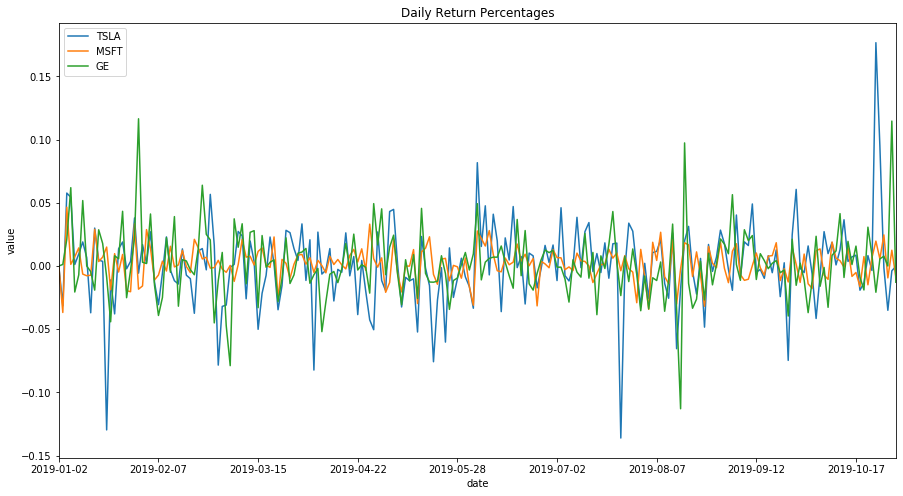

In [10]:
ax = returns_df.plot(figsize=(15,8), title="Daily Return Percentages")
_ = ax.set_ylabel("value")

In [11]:
final_df = (returns_df+1).cumprod()-1

In [12]:
print(final_df.head(5))
print(final_df.tail(5))

                TSLA      MSFT        GE
date                                    
2019-01-02  0.000000  0.000000  0.000000
2019-01-03 -0.031472 -0.036788  0.001232
2019-01-04  0.024410  0.008010  0.022351
2019-01-07  0.080098  0.009296  0.085708
2019-01-08  0.081356  0.016614  0.063344
                TSLA      MSFT        GE
date                                    
2019-10-25  0.058074  0.407502  0.166801
2019-10-28  0.056720  0.442107  0.175876
2019-10-29  0.019670  0.428505  0.175876
2019-10-30  0.015768  0.446307  0.310706
2019-10-31  0.015478  0.433905  0.293852


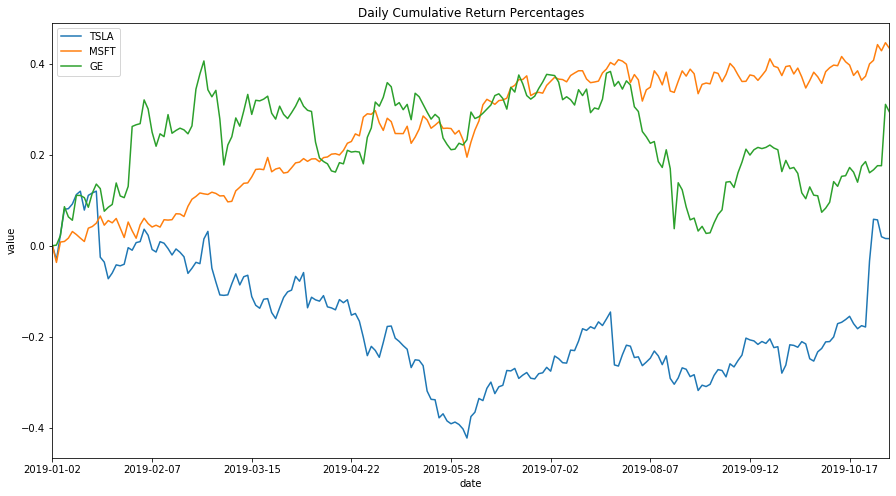

In [13]:
ax = final_df.plot(figsize=(15,8), title="Daily Cumulative Return Percentages")
_ = ax.set_ylabel("value")

### Testing our cumulative calculation

Another way to test is to get the price and cumulated return on a certain date, then see if the price of that date equals to the first date's price times the cumulated return + 1. This testing process is demonstrated below.

In [28]:
# Let's get TSLA's prices and returns.

final_date = '2019-06-03'

initial_price = prices_df.iloc[0]['TSLA']
price_on_date = prices_df.loc[date]['TSLA']
cum_ret = final_df.loc[date]['TSLA']
print("initial price (p): ${}".format(initial_price))
print("price on date {} (P): ${}".format(final_date, price_on_date))
print("cumulative return on date {} (r): {}".format(final_date, cum_ret))

# Then determine if the calculation matches
import math
print("is P = p * (r+1)? {}".format(math.isclose(price_on_date, initial_price * (cum_ret+1))))

initial price (p): $310.12
price on date 2019-06-03 (P): $178.97
cumulative return on date 2019-06-03 (r): -0.4229008125886752
is P = p * (r+1)? True
